# Homework 5: Detecting Breast Cancer — Classifying Tumors 🩺

Name:Ray Zhang

Student ID: 458445

Collaborators:


## Instructions

For this homework, work through **Lab 5 (Detecting Breast Cancer — Understanding Logistic Regression)** first. Many of the things we ask you to do in this homework are explained in the lab. In general, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend).

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will be taken into account during the grading and regrading process.

In [1]:
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings

# your code here
answer = 'my answer'

### Submission instructions
* Submit this python notebook including your answers in the code cells as homework submission.
* **Do not change the number of cells!** Your submission notebook should have exactly one code cell per problem. 
* Do **not** remove the `# your code here` line and add you solution after that line. 

## 1. Predicting Breast Cancer
Since all of this looks pretty good now, we can turn to our actual application for _this week_: predicting whether a patient has breast cancer or not. First, let's take a quick look at the data from the University of Wisconsin. Each data point contains information about the breast cancer cells of a single patient derived from a digitized image of a fine needle aspirate (FNA) of a breast mass, similar to those: 

![fine needle aspirate](utility/pics/fna.jpg)

Note that we do not have the image data, but the features capture the cell shapes and we also have the diagnosis (either `malignant` or `benign`), which we will treat as the class label.

### Understanding the Dataset

Let's take a look at what we have.

In [2]:
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()

### Problem 1.1

Let's take a second to explore `data`.

**Try this!** In the following cell, evaluate each of the fields in data.

In [3]:
# your code here
import numpy as np

cancer_data.keys()
cancer_data.data.shape
cancer_data.feature_names
cancer_data.DESCR
#np.count_nonzero(cancer_data.target)
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

**Write-up!** Just for safe-keeping, how many data points are there in this dataset? How many features? What are the names of the features? What are the names of the classes and how are they encoded in the labels?

### Problem 1.2

Now that we are familiar with what the data looks like, let's pull out what we need from it.

**Try this!** Pull out the input data `X` and label (classification) data `y` from `data`. Make sure that the labels in `y` are either `+1` for `malignant` or `-1` for `benign` tumors.

In [4]:
cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
# your code here

X = cancer_data.data
y = cancer_data.target
y[y == 0] = -1

N, d = X.shape
f'There are {N} data points with {d} features each.'

'There are 569 data points with 30 features each.'

### Problem 1.3

Let's plot the distribution of the classes in the dataset.

Plots configured! 📊
[212 357]
[-1  1]


Text(0.5, 1.0, 'Class Distribution - Breast Cancer Dataset')

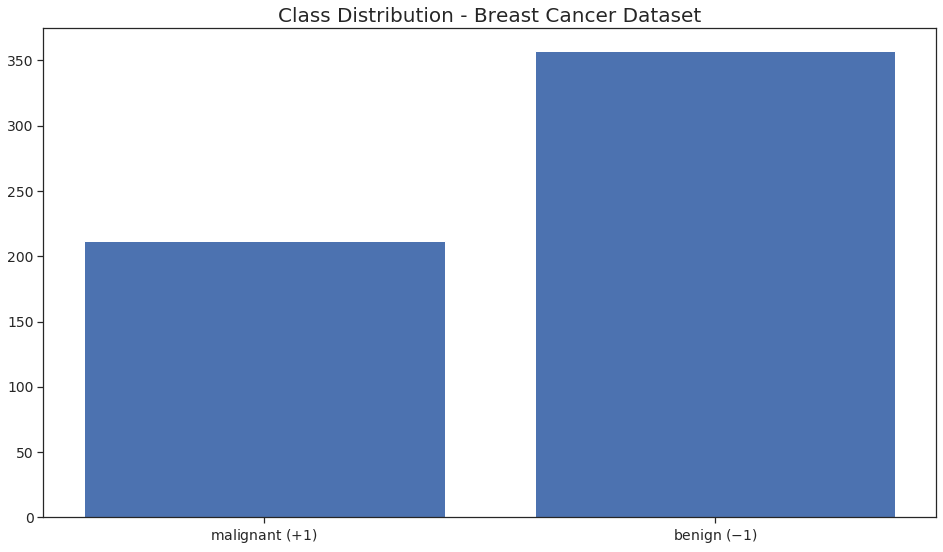

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from utility.util import configure_plots

configure_plots()

classes, counts = np.unique(y, return_counts=True)

print(counts)
print(classes)

plt.bar(['malignant ($+1$)', 'benign ($-1$)'], counts)
plt.title('Class Distribution - Breast Cancer Dataset')

**Write-up!** What do you notice about the number of observations in each class? Could this potentially lead to problems for our modeling? Think about the data (specifically, the subsets) of data we use to train the data.

Before we train any model, we split our data into two or more subsets for training, validation, and testing. The [`train_test_split` 🔗](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function provided by Scikit-Learn has a keyword argument called `stratify`.

**Write-up!** What does the `stratify` argument do according to the function's documentation? Why do we use `stratify` when creating our training and testing sets for this dataset? How would our evaluation of the model be affected if we did not use stratify?

### Training the Logistic Regression Model

Now, you will train the classifier and then evaluate its performance. 

In the lab, we implemented Logistic Regression as described and formulated in class. In this series of problems, we will first review the model and practice building one with `sklearn`.

### Problem 1.4

First, we will begin by creating training and test sets with which we will build and evaluate our model with. Then, we will create a new instance of a `LogisticRegression` model and fit it with our training set. As we noticed in [Problem 1.3](#Problem-1.3), our dataset does not have a balanced class distribution. We will need to handle this accordingly.

**Try this!** In the following cell, you should do the following:
1. Creates a train/test split with `train_test_split` with a `test_size` of 0.3, stratification by `y` with `stratify`, and a `random_state` of 4.
2. Creates a new `LogisticRegression` model with the `'liblinear'` `solver` and `fit` it with the training set and stores it in `linear_model`.
3. Evaluate the performance by manually computing and printing the classification _accuracy_ of your trained model on the test set.

> **Hint**: Feel free to refer to any official documentation and remember that you can easily view the documentation in your notebook for any function or object by adding a `?` after its name (eg. `train_test_split?`).

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4, stratify=y)
linear_model = LogisticRegression(solver = 'liblinear')
linear_model.fit(X_train, y_train)
pred = linear_model.predict(X_test)
n = 0
for i in range(len(pred)):
    if pred[i] == y_test[i]:
        n += 1
        

f'Accuracy: {n/len(pred)}'


'Accuracy: 0.9473684210526315'

Looks pretty good!

## 2. Diving Deeper into Classification Error

While our model's accuracy was pretty good, let's analyze this accuracy more closely. For classification problems we can, instead of just counting mistakes, look at which kind of mistakes we made.

### Problem 2.1

**Write-up!** What are the two different kinds of mistakes we can make for breast cancer prediction? _**Hint**: Think about the decision that our model is making._

**Write-up!** Recall that in Lab3 we counted false positives and false negatives. What are false positives and false negatives and why do we care to distinguish between them when they are both errors made by our classifier model? In the context of classifying tumors as either malignant or benign, does it make sense to prefer one type of mistake over the other? If so, which one and why? If not, also explain why?

### Confusion Matrices

A [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix), sometimes called an error matrix, helps us summarize and understand the performance of our classification models by presenting the different types of correct and incorrect predictions our model is making: true positives, true negatives, false positives, and false negatives.

<img alt="confusion matrix" src="utility/pics/confusion-matrix.png" />

— [Source](https://jkmsmkj.blogspot.com/2018/10/confusion-matrix.html)

### Problem 2.2

**Try this!** In the following cell, use `confusion_matrix` from `sklearn.metrics` to compute the confusion matrix for the model you built in [Problem 1.4](#Problem-1.4). Then, use `plot_confusion_matrix` to visualize the matrix (you will need to specify the `labels` to use). `HINT` Again, feel free to refer to any official documentation and remember that you can easily view the documentation for a function or object by adding a `?` after its name (eg. `confusion_matrix?`).

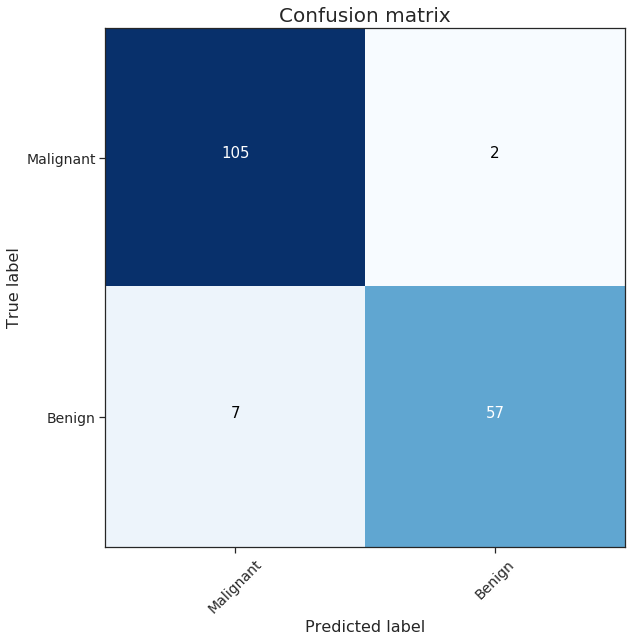

In [8]:
from sklearn.metrics import confusion_matrix
from utility.util import plot_confusion_matrix

# your code here

cm = confusion_matrix(y_test,pred)
plot_confusion_matrix(cm, labels=['Malignant','Benign'])

### Experiment: Making Decisions

Now, let's take a look at decision boundaries. As we mentioned in both lecture and lab, label predictions (eg. $\hat{y} = +1$) are made by considering the class probabilities $P(y = +1 \mid x)$ produced by our model with a decision threshold. Typically, we use a threshold of 0.5 such that $\hat{y} = +1$ if $P(y = +1 \mid x) > 0.5$. However, as we hinted in [Problem 2.1](#Problem-2.1), there are situations and contexts in which the cost of making a _false positive_ error is greater than making a _false negative_ error. We can account for cost differences by adjusting the threshold, and therefore the decision boundary, of our classifier.

In the following few cells, we will prepare an experiment to test and observe the effects of changing the decision threshold of our classification model.

### Problem 2.3

The first thing we will need to prepare is a way to compute the predictions of a model given a threshold. This is because `sklearn` does not offer an option to do this.

**Try this!** Complete the `make_predictions` function so that it computes the predicted labels `y_pred` $\in [-1, 1]$ for data `X_test` with a given `model` and decision `threshold`. `HINT` You may find the `model.predict_proba` method and [this StackOverflow thread](https://stackoverflow.com/questions/30820962/splitting-columns-of-a-numpy-array-easily) to be helpful.

In [9]:
def make_predictions(model, X_test, threshold=0.5):
    '''
    Computes the predicted labels for points in X_TEST using a given MODEL and THRESHOLD
    '''
    
    # your code here
    x, y_pred = model.predict_proba(X_test).T
    y_pred[y_pred <= threshold] = -1
    y_pred[y_pred > threshold] = 1
    
    assert isinstance(y_pred, np.ndarray), \
        'Please return your predictions as an NumPy array'
    assert np.all(np.isin(np.unique(y_pred), [-1, 1])), \
        'Your predictions should be either -1 or +1'
    
    return y_pred



### Problem 2.4

Next, we will combine all of the things we have done in earlier problems into a single function that produces a confusion matrix plot by fitting and evaluating new Logisitic Regression models with varying thresholds. Note that there will be some redundancy/inefficiency in this function because it repeatedly recomputes the same values, but it is okay as it simplifies the code.

**Try this!** Complete the `boundary_experiment` function so that it does the following:
1. Creates a train/test split with `train_test_split` with a `test_size` of 0.3, stratification by `y` with `stratify`, and a `random_state` of 11.
2. Creates a new `LogisticRegression` model with the `'liblinear'` `solver` and `fit` it with the training set.
3. Makes predictions `y_pred` for test set points using `make_predictions` and `threshold`.
4. Computes a confusion matrix and then plots it using `plot_confusion_matrix`.

`HINT` Feel free to refer to any official documentation and remember that you can easily view the documentation for a function or object by adding a `?` after its name (eg. `plot_confusion_matrix?`).

In [10]:
def boundary_experiment(X, y, threshold=0.5):
    
    # your code here
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=11)
    model = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)
    res = make_predictions(model, X_test, threshold)
    cm = confusion_matrix(y_test, res)
    plot_confusion_matrix(cm, labels=['Malignant','Benign'])



### Problem 2.5

In the following cell, we will experiment with how changing the decision boundary (threshold) affects the confusion matrix using the functions that you implemented earlier. In order to make the visualization work you will need to install an additional package, `ipywidgets`.

#### Jupyter Lab
If you are using Jupyter Lab, you will need to install [node.js](https://nodejs.org/en/) first. You can do this via [brew](https://brew.sh).

```
$ brew install node
```

Then, you execute

```
$ jupyter labextension install @jupyter-widgets/jupyterlab-manager
```
as described in this [this article](https://ipywidgets.readthedocs.io/en/stable/user_install.html#installing-the-jupyterlab-extension). Then, restart Jupyter Lab

#### Jupyter Notebook or Anaconda
If you are using Jupyter Notebook or Anaconda, then follow the instructions described in this [this article](https://ipywidgets.readthedocs.io/en/stable/user_install.html).

**Try this!** Evaluate the following cell and experiment with the slider.

In [11]:
from ipywidgets import interactive, fixed

interactive(boundary_experiment, X=fixed(X), y=fixed(y), threshold=(0, 1, 0.01))


interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

**Write-up!** How does changing the threshold affect the confusion matrix (eg. correct classifications and errors)? What is the smallest threshold, if any, that eliminates false positive errors? What is the largest threshold, if any, that eliminates false negative errors? In each case, explain whether or not we would want to do so?

## 3. An Explainable Classifier: Decision Trees

With the rapid development and advancement in artificial intelligence (AI) technologies, including the machine learning that we use in this class, there is an increasing concern over the ethics of AI. There are often situations where AI is used and in which it is critically important to be sure that a model is both reliable and correct. For many models, it is often difficult to explain why they produce the results that they do. These concerns have led to much debate and the advent of the [Explainable AI (XAI)](https://en.wikipedia.org/wiki/Explainable_Artificial_Intelligence) movement. The goal of XAI is to promote the development of AI whose actions and decisions can be easily understood by humans. Though not originally designed with XAI in mind, decision trees have increasingly become the focus of attention within this movement.

Perhaps, this is an alternative model we can use to predict breast cancer.

In the following section, we will introduce and explore, though not to great depths, what decision trees are and how they can be used as explainable classification models. We will later use this model to explore model complexity.

### How Do They Work?

Intuitively, a decision tree classifier tries to determine the class of a data point by making a series of "tests". Consider the following diagram of a decision tree that attempts to predict whether it will rain:

![dtree](utility/pics/decision-tree.png)

— [Source](https://prateekvjoshi.com/2016/03/22/how-are-decision-trees-constructed-in-machine-learning/)

At each level (or depth), a feature of the data is examined and and a decision is made. The outcomes of that decision are represented as branches of the tree. In the tree above, the first feature that is examined is temperature, and if the temperature is greater 70 degrees we will do one thing and if it is less than 70, we will do another thing.

What makes decision trees explainable is that we, as humans, can read off and follow exactly how the decision tree came to it's conclusion.

### Building Decision Trees

We will not discuss how decision trees are built in this course. Instead, we will opt to do do that for you. The following cell contains a function that takes a training set and produces a fit decision tree classification model.

The main thing to know about decision trees is that their complexity is directly determined by their depth. As we mentioned before, each level of depth in the tree is another set of decisions that the model can make. By increasing the depth of the tree, we increase the complexity of the model.

In [12]:
from sklearn.tree import DecisionTreeClassifier

def make_decision_tree(X_train, y_train, depth=None):
    return DecisionTreeClassifier(max_depth=depth, random_state=4).fit(X_train, y_train)


Let's try to build a decision tree to classify breast cancer tumors. We will reuse the training and testing sets we made earlier.

In [13]:
tree_model = make_decision_tree(X_train, y_train)

In [14]:
tree_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4, splitter='best')

### Visualizing the Decision Tree

Again, the selling point of decision trees is that they are readily interpretable. Let's take a look at what our model looks like.

### Problem 3.1

The following cell produces text and encodes what the tree looks like. We will use a online tool called [Viz.js](http://viz-js.com/) to visualize the results.

**Try this!** Run the following cell and copy/paste the outputs in to [Viz.js](http://viz-js.com/). Then clear the outputs of the cell.

In [15]:
from sklearn.tree import export_graphviz

encoding = export_graphviz(tree_model, impurity=False, filled=True, rounded=True,
                           feature_names=cancer_data.feature_names,
                           class_names=cancer_data.target_names)
print(encoding)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="worst perimeter <= 105.95\nsamples = 398\nvalue = [148, 250]\nclass = benign", fillcolor="#aed7f4"] ;
1 [label="worst concave points <= 0.158\nsamples = 239\nvalue = [9, 230]\nclass = benign", fillcolor="#41a1e6"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="area error <= 91.555\nsamples = 231\nvalue = [3, 228]\nclass = benign", fillcolor="#3c9ee5"] ;
1 -> 2 ;
3 [label="worst smoothness <= 0.191\nsamples = 230\nvalue = [2, 228]\nclass = benign", fillcolor="#3b9ee5"] ;
2 -> 3 ;
4 [label="mean fractal dimension <= 0.054\nsamples = 228\nvalue = [1, 227]\nclass = benign", fillcolor="#3a9de5"] ;
3 -> 4 ;
5 [label="mean smoothness <= 0.086\nsamples = 6\nvalue = [1, 5]\nclass = benign", fillcolor="#61b1ea"] ;
4 -> 5 ;
6 [label="samples = 5\nvalue = [0, 5]\nclass = benign", fillcolor="#399de5"] ;
5 -> 6 ;
7 [label="samples = 1\nvalue =

**Write-up!** What was the maximum depth of the decision tree?

### Problem 3.2

Let's evaluate the performance of the "max-depth" decision tree we just visualized.

**Try this!** In the cell below, compute the accuracy of the `tree_model` on our testing data.

In [16]:
# your code here
max_tree = tree_model.predict(X_test)
j = 0
for i in range(len(max_tree)):
    if max_tree[i] == y_test[i]:
        j += 1
        

f'Accuracy: {n/len(pred)}'

'Accuracy: 0.9473684210526315'

**Write-up!** How does this compare to the performance of our linear model?

## 4. Model Selection
In the lecture we saw that higher-order polynomials can give us more complex models. Typically increasing model complexity can help improving the performance. However, only to a certain extent. At some point you start to overfit and the performance on a held-out test set will start to decrease again. For decision trees model complexity increases with the depth of the trees used. It is pretty easy to see that by using a sufficient number of splits, you can classify the entire training set correctly. That is classic _overfitting_. 

### Problem 4.1

**Try this!** In the cell below, compute the training and validation error of decision tree classifiers with depths from `1` to `10`.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

X_rest, X_test, y_rest, y_test = \
    train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)
X_train, X_val, y_train, y_val = \
    train_test_split(X_rest, y_rest, test_size=0.15, stratify=y_rest, random_state=10)


# your code here
te = np.zeros(10)
ve = np.zeros(10)
i=1
while i < 11:
    decision_tree = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    training_error = 1-decision_tree.score(X_train, y_train)
    validation_error = 1 - decision_tree.score(X_val, y_val)
    te[i-1]=training_error
    ve[i-1]=validation_error
    i+=1

**Try this!** Plot the training and validation error curves against the depth that produced them.

<function matplotlib.pyplot.show(*args, **kw)>

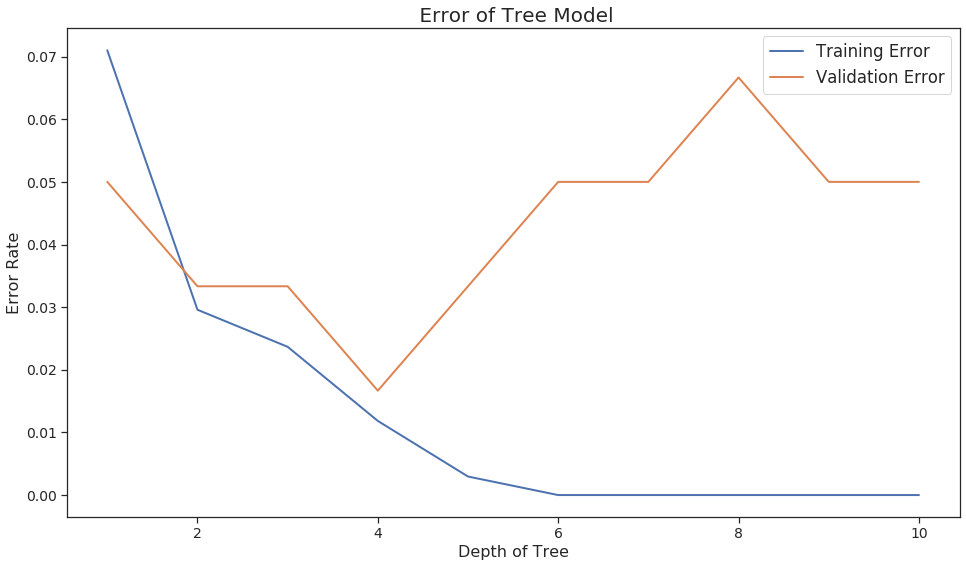

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# your code here
depth = np.arange(1,11)
ax1, = plt.plot(depth, te)
ax2, = plt.plot(depth, ve)
plt.title(' Error of Tree Model')
plt.legend((ax1, ax2),('Training Error', 'Validation Error'))
plt.xlabel('Depth of Tree')
plt.ylabel('Error Rate')
plt.show
    


**Write-up!** Which model (which depths) would you choose and why? 

### Problem 4.2
Evaluate the model you selected above by computing the test error. Print the test error. 
> Hint: You will have to retrain your model. 

In [20]:
# your code here

decision_tree_max = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
training_error_max = 1-decision_tree.score(X_test, y_test)
print(training_error_max)


0.07017543859649122


And that's it!